Cross-validation R2 scores: [0.25401926 0.39607791 0.41786136 0.35212153 0.44729754]
Mean CV R2: 0.37347552175193377
Test MSE: 3687.7021347360837
Test R2: 0.3039644182013884

Feature Importance:
  Feature  Coefficient
0     bmi    40.293081
1      bp    18.010582
2      s1     8.211742
3      s2    -8.683599


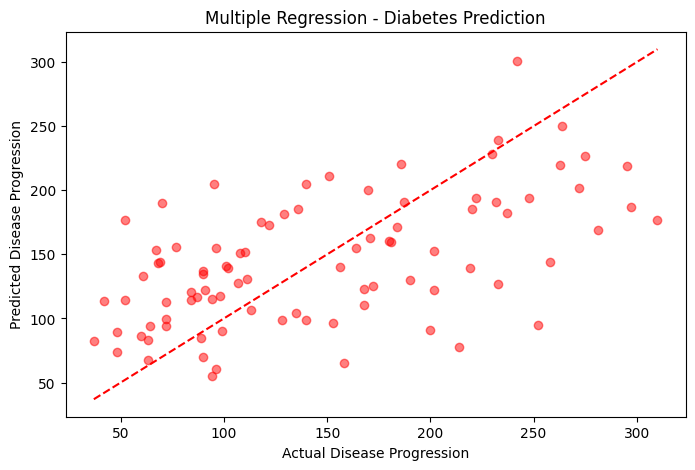

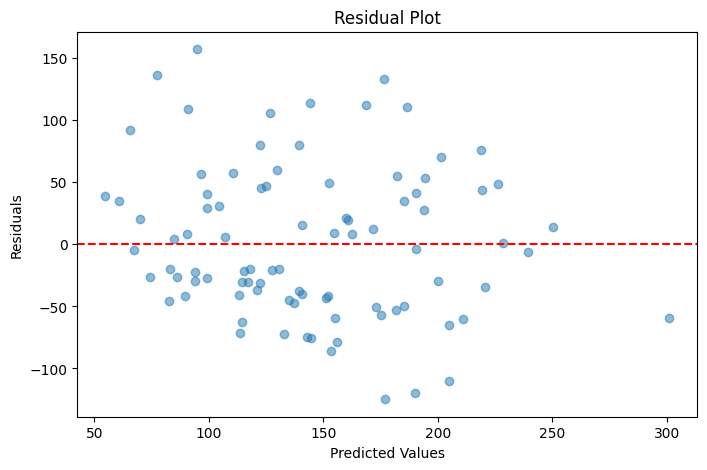

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = load_diabetes(as_frame=True)
df = data.frame

# Select features and target
features = ["bmi", "bp", "s1", "s2"]
X = df[features]
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Cross-validation score
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))

# Feature importance
coef = pd.DataFrame({"Feature": features, "Coefficient": model.coef_}).sort_values(by="Coefficient", ascending=False)
print("\nFeature Importance:")
print(coef)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="red", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Multiple Regression - Diabetes Prediction")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
